In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random

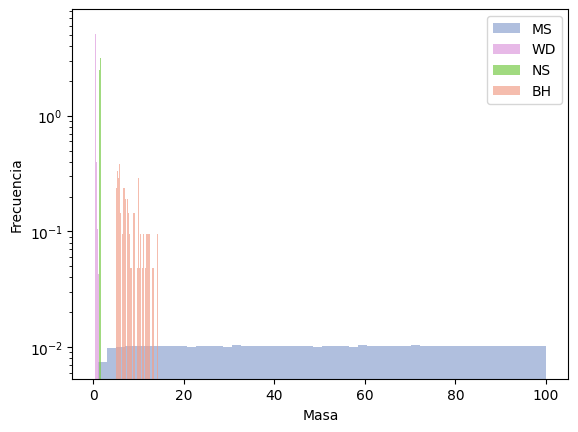

In [12]:
num = 1000000 #número de galaxias
#Milky way star mass
masa_min = 0.08
masa_max = 100
masas = np.random.uniform(masa_min, masa_max, num)
imf = []

for i in masas:
    if 0.08 <= i < 0.5:
        alpha = -1.3
    else:
        alpha = -2.3

    masa_generada = (i ** alpha) * math.log(10 * i)
    imf.append(masa_generada)

#Age Milky way
age_min = 0
age_max = 10000000000 #yrs

paso = (age_max - age_min) / (num - 1)
paso = round(paso)
TOB = list(range(age_min, age_max + 1, paso)) #time of birth
random.shuffle(TOB)
TMS = [(10**10)/ (x**2.5) for x in masas] #time Main Sequence

#Main sequence stars:
MS_stars=[]
rem = [] #remanentes(fuera de la main sequence)
time_MS=[]
time_rem=[]

for i,v in enumerate(TMS):
    if v > TOB[i]:
        rem.append(masas[i])
        time_rem.append(TOB[i])
    elif v<TOB[i]:
        MS_stars.append(masas[i])
        time_MS.append(TOB[i])

#white dwarfs
masa_f_WD = []
time_WD = []
for i in range(len(rem)):
    if  rem[i] < 9:
        masa_WD = (0.109*rem[i])+0.394
        masa_f_WD.append(masa_WD)
        time_WD.append(time_rem[i])

#neutron stars 
masa_f_NS = []
time_NS=[]
for i in range (len(rem)):
    if 9 <= rem[i] <= 13:
        masa_NS = 2.24 + 0.508*(rem[i]-14.75) + 0.125*(rem[i]-14.75)**2 + 0.0110*(rem[i]-14.75)**3
        masa_f_NS.append(masa_NS)
        time_NS.append(time_rem[i])
    elif 13 < rem[i] < 15:
        masa_NS = 0.123+0.112*rem[i]
        masa_f_NS.append(masa_NS)
        time_NS.append(time_rem[i])
    elif 15 <= rem[i] < 17.8:
        masa_NS = 0.996 + 0.0384*rem[i]
        masa_f_NS.append(masa_NS)
        time_NS.append(time_rem[i])
    elif 17.8 < rem[i] < 18.5:
        masa_NS = -0.020 + 0.10*rem[i]
        masa_f_NS.append(masa_NS)
        time_NS.append(time_rem[i])

#black holes
f_ej = 0.9        
masa_f_BH = []
time_BH = []
for i in range(len(rem)):
    if 15 <= rem[i] <= 40:
        masa_core = -2.040 + 0.4140*rem[i]
        masa_all = 15.52 - 0.3294 *(rem[i]-25.97) - 0.02121*(rem[i]-25.97)**2 + 0.003120*(rem[i]-25.97)**3
        masa_BH = f_ej*masa_core + (1-f_ej)*masa_all
        masa_f_BH.append(masa_BH)
        time_BH.append(time_rem[i])
    elif 45 <= rem[i] <= 120:
        masa_BH = 5.697 + 7.8598 * (1e8)*(rem[i])**(-4.858)
        masa_f_BH.append(masa_BH)
        time_BH.append(time_rem[i])


alpha = 0.7         
plt.hist(MS_stars, bins=50,alpha=alpha,color='#8FA4D0', label='MS' , density = True)
plt.hist(masa_f_WD, bins=50,alpha=alpha,color='#DE9CDD',label = 'WD', density = True)
plt.hist(masa_f_NS, bins=50,alpha=alpha,color='#79CB4A', label = 'NS',density = True)
plt.hist(masa_f_BH, bins=50,alpha=alpha,color='#F1A18C', label='BH', density = True)
plt.legend(loc='best')
plt.xlabel('Masa')
plt.ylabel('Frecuencia')
plt.yscale('log')



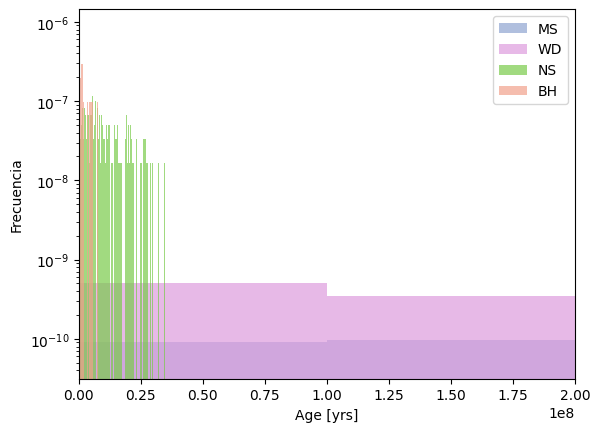

In [16]:
#Age of bodies
alpha = 0.7         
plt.hist(time_MS, bins=100,alpha=alpha,color='#8FA4D0', label='MS' , density = True)
plt.hist(time_WD, bins=100,alpha=alpha,color='#DE9CDD',label = 'WD', density = True)
plt.hist(time_NS, bins=100,alpha=alpha,color='#79CB4A', label = 'NS',density = True)
plt.hist(time_BH, bins=100,alpha=alpha,color='#F1A18C', label='BH', density = True)
plt.legend(loc='best')
plt.xlim(0,0.2*1e9)
plt.xlabel('Age [yrs]')
plt.ylabel('Frecuencia')
plt.yscale('log')


In [17]:
#fraction of bodies
fraction_MS=(len(MS_stars)/num)*100
fraction_WD=(len(masa_f_WD)/num)*100
fraction_NS=(len(masa_f_NS)/num)*100
fraction_BH=(len(masa_f_BH)/num)*100
print(f"{fraction_MS}% {fraction_WD}% {fraction_NS}% {fraction_BH}%")

98.4113% 1.5633000000000001% 0.017499999999999998% 0.0112%


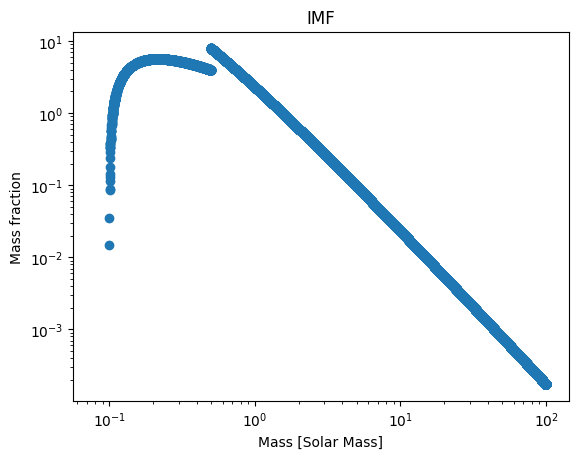

Text(0.5, 1.0, 'SFR')

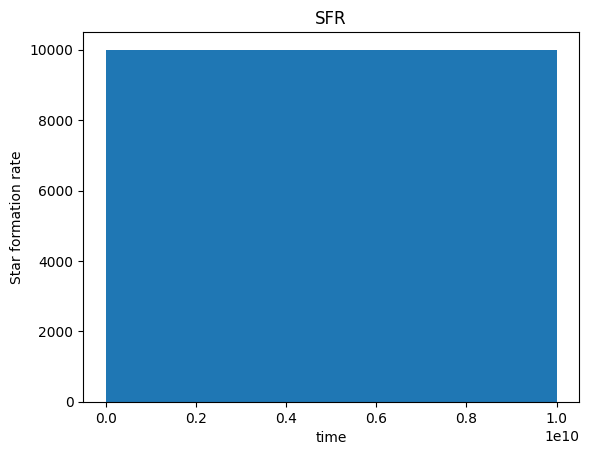

In [21]:
plt.scatter(masas,imf)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mass fraction')
plt.xlabel('Mass [Solar Mass]')
plt.title('IMF')
plt.show()
plt.hist(TOB,bins=100)
plt.ylabel('Star formation rate')
plt.xlabel('time')
plt.title('SFR')